# Import libraries

In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

%matplotlib inline

# Read csv

In [27]:
data = pd.read_csv('Data/ml.csv')

In [28]:
#Check the columns

data.columns

Index(['date_submitted', 'is_banked', 'score', 'code_module',
       'code_presentation', 'gender', 'region', 'highest_education',
       'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits',
       'disability', 'final_result', 'module_presentation_length'],
      dtype='object')

In [29]:
#Number of rows and columns

data.shape

(207156, 15)

In [30]:
#Transform categorical variables to object

data['is_banked'] = data['is_banked'].apply(str)
data['code_module'] = data['code_module'].apply(str)
data['code_presentation'] = data['code_presentation'].apply(str)

In [31]:
#Dummies

to_dummies = ['is_banked','code_module', 'code_presentation', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'disability', 'final_result',]

data = pd.get_dummies(data, columns=to_dummies)

In [32]:
#Check columns

data.columns

Index(['date_submitted', 'score', 'num_of_prev_attempts', 'studied_credits',
       'module_presentation_length', 'is_banked_0', 'is_banked_1',
       'code_module_AAA', 'code_module_BBB', 'code_module_CCC',
       'code_module_DDD', 'code_module_EEE', 'code_module_FFF',
       'code_module_GGG', 'code_presentation_2013B', 'code_presentation_2013J',
       'code_presentation_2014B', 'code_presentation_2014J', 'gender_F',
       'gender_M', 'region_East Anglian Region', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'highest_education_A Level or Equivalent',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
      

In [33]:
#Separate target from the rest of columns

data_data = data[['date_submitted', 'num_of_prev_attempts', 'studied_credits',
       'module_presentation_length', 'is_banked_0', 'is_banked_1',
       'code_module_AAA', 'code_module_BBB', 'code_module_CCC',
       'code_module_DDD', 'code_module_EEE', 'code_module_FFF',
       'code_module_GGG', 'code_presentation_2013B', 'code_presentation_2013J',
       'code_presentation_2014B', 'code_presentation_2014J', 'gender_F',
       'gender_M', 'region_East Anglian Region', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'highest_education_A Level or Equivalent',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification', 'imd_band_0-10%',
       'imd_band_10-20', 'imd_band_20-30%', 'imd_band_30-40%',
       'imd_band_40-50%', 'imd_band_50-60%', 'imd_band_60-70%',
       'imd_band_70-80%', 'imd_band_80-90%', 'imd_band_90-100%', 'imd_band_?',
       'age_band_0-35', 'age_band_35-55', 'age_band_55<=', 'disability_N',
       'disability_Y', 'final_result_Distinction', 'final_result_Fail',
       'final_result_Pass', 'final_result_Withdrawn']]

data_target = data_ml["score"]

In [34]:
# Split Train and Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(data_data, data_target, test_size=0.3, random_state=42)

In [35]:
#Grid search for parameter selection for a Random Forest Regressor model
param_grid = {
    'n_estimators': [100, 1000],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [25, 15]
}

In [36]:
RFR = RandomForestRegressor(n_jobs=-1)
GS = GridSearchCV(RFR, param_grid, cv=5, verbose = 3)

In [37]:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=25, max_features=auto, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=25, max_features=auto, n_estimators=100, score=0.2902980482339025, total=  34.1s
[CV] max_depth=25, max_features=auto, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.3s remaining:    0.0s


[CV]  max_depth=25, max_features=auto, n_estimators=100, score=0.2795377203994047, total=  29.9s
[CV] max_depth=25, max_features=auto, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


[CV]  max_depth=25, max_features=auto, n_estimators=100, score=0.3015678536917594, total=  29.6s
[CV] max_depth=25, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=25, max_features=auto, n_estimators=100, score=0.2900818050298286, total=  29.9s
[CV] max_depth=25, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=25, max_features=auto, n_estimators=100, score=0.29806262184868804, total=  29.6s
[CV] max_depth=25, max_features=auto, n_estimators=1000 ..............
[CV]  max_depth=25, max_features=auto, n_estimators=1000, score=0.2949614442855907, total= 5.1min
[CV] max_depth=25, max_features=auto, n_estimators=1000 ..............
[CV]  max_depth=25, max_features=auto, n_estimators=1000, score=0.28682417588919407, total= 5.1min
[CV] max_depth=25, max_features=auto, n_estimators=1000 ..............
[CV]  max_depth=25, max_features=auto, n_estimators=1000, score=0.30622365984616806, total= 5.0min
[CV] max_depth=25, max_features=auto, n_estimators=1000 .

[CV]  max_depth=15, max_features=log2, n_estimators=100, score=0.2485975997258253, total=   4.0s
[CV] max_depth=15, max_features=log2, n_estimators=100 ...............
[CV]  max_depth=15, max_features=log2, n_estimators=100, score=0.2644839969515822, total=   4.0s
[CV] max_depth=15, max_features=log2, n_estimators=100 ...............
[CV]  max_depth=15, max_features=log2, n_estimators=100, score=0.2553430159889427, total=   4.1s
[CV] max_depth=15, max_features=log2, n_estimators=100 ...............
[CV]  max_depth=15, max_features=log2, n_estimators=100, score=0.2608751599331115, total=   4.0s
[CV] max_depth=15, max_features=log2, n_estimators=1000 ..............
[CV]  max_depth=15, max_features=log2, n_estimators=1000, score=0.25264588358908724, total=  38.7s
[CV] max_depth=15, max_features=log2, n_estimators=1000 ..............
[CV]  max_depth=15, max_features=log2, n_estimators=1000, score=0.25142787991481974, total=  38.5s
[CV] max_depth=15, max_features=log2, n_estimators=1000 ...

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 78.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [25, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [38]:
GS.best_params_

{'max_depth': 25, 'max_features': 'sqrt', 'n_estimators': 1000}

In [39]:
RFR = RandomForestRegressor(max_depth = 25, max_features='sqrt', n_estimators=1000)
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [40]:
y_train_pred = RFR.predict(X_train)
y_pred = RFR.predict(X_test)

TRAIN MODEL METRICS:
The R2 score is: 0.7432713203286277
The MAE score is: 7.251468092215323


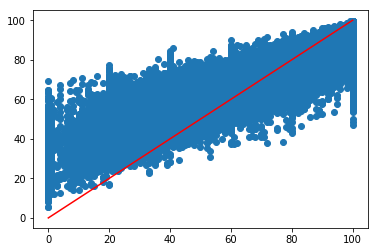

In [41]:
r2 = r2_score(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
print ('TRAIN MODEL METRICS:')
print('The R2 score is: ' + str(r2))
print('The MAE score is: ' + str(mae))

plt.scatter(y_train, y_train_pred)
plt.plot([0,100], [0,100], color='red')
plt.show()

TEST MODEL METRICS:
The R2 score is: 0.3215301604602927
The MAE score is: 11.612282578596071


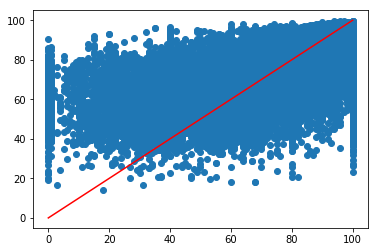

In [42]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print ('TEST MODEL METRICS:')
print('The R2 score is: ' + str(r2))
print('The MAE score is: ' + str(mae))

plt.scatter(y_test, y_pred)
plt.plot([0,100], [0,100], color='red')
plt.show()

In [111]:
data_ml.head()

,date_submitted,score,num_of_prev_attempts,studied_credits,module_presentation_length,is_banked_0,is_banked_1,code_module_AAA,code_module_BBB,code_module_CCC,...,imd_band_?,age_band_0-35,age_band_35-55,age_band_55<=,disability_N,disability_Y,final_result_Distinction,final_result_Fail,final_result_Pass,final_result_Withdrawn
0,18,78.0,0,240,268,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
1,53,85.0,0,240,268,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
2,115,80.0,0,240,268,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
3,164,85.0,0,240,268,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
4,212,82.0,0,240,268,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0


In [113]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207156 entries, 0 to 207155
Data columns (total 58 columns):
date_submitted                                   207156 non-null int64
score                                            207156 non-null float64
num_of_prev_attempts                             207156 non-null int64
studied_credits                                  207156 non-null int64
module_presentation_length                       207156 non-null int64
is_banked_0                                      207156 non-null uint8
is_banked_1                                      207156 non-null uint8
code_module_AAA                                  207156 non-null uint8
code_module_BBB                                  207156 non-null uint8
code_module_CCC                                  207156 non-null uint8
code_module_DDD                                  207156 non-null uint8
code_module_EEE                                  207156 non-null uint8
code_module_FFF                    